# Task 2 Exploratory Data Analysis
## import labeled data

In [20]:
import pandas as pd
df = pd.read_csv("test_labeled (6).xls")
print(df.head())

                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   
3  we were thinking papasitos (we can meet somewh...  3/25/2010   
4  Since you never gave me the $20 for the last t...  5/21/2011   

                      from sentiment  
0     sally.beck@enron.com  positive  
1      eric.bass@enron.com  positive  
2     sally.beck@enron.com   neutral  
3  johnny.palmer@enron.com   neutral  
4  lydia.delgado@enron.com  positive  


## import libraries

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

## Sentiment Label Distribution

sentiment
positive    1713
neutral      442
negative      36
Name: count, dtype: int64


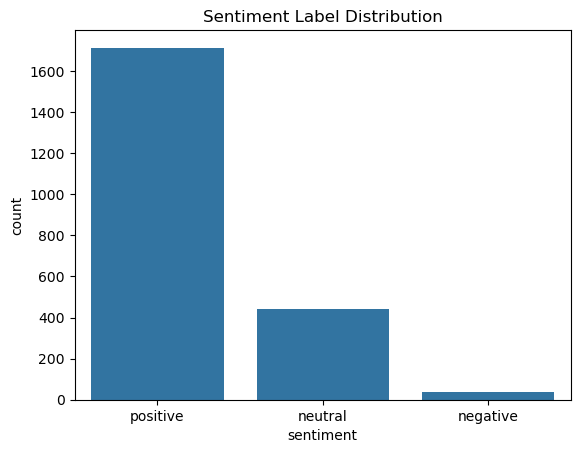

In [22]:
#find out the counts for each sentiment label
print(df['sentiment'].value_counts())

#use seaborn to generate bar chart
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Label Distribution")
plt.show()

## Monthly Sentiment Trends

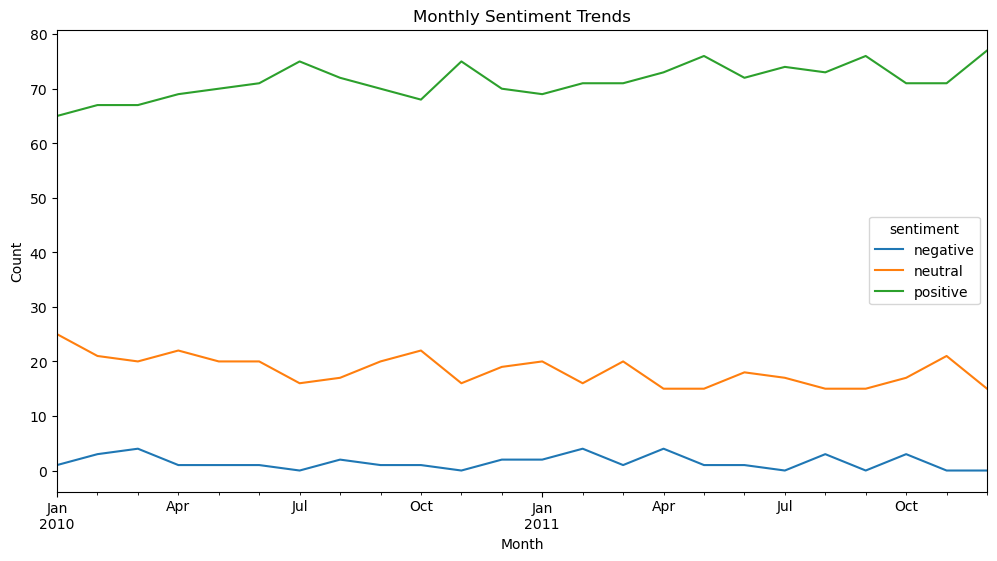

In [23]:
# Convert date
df['date'] = pd.to_datetime(df['date'])

# Group by month and sentiment, count occurrences
monthly_sentiment = df.groupby([df['date'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0)

#monthly sentiment trends using line graph
monthly_sentiment.plot(kind='line', figsize=(12,6))
plt.title("Monthly Sentiment Trends")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

## Top 10 message senders

<Axes: title={'center': 'Top 10 Message Senders'}, xlabel='from'>

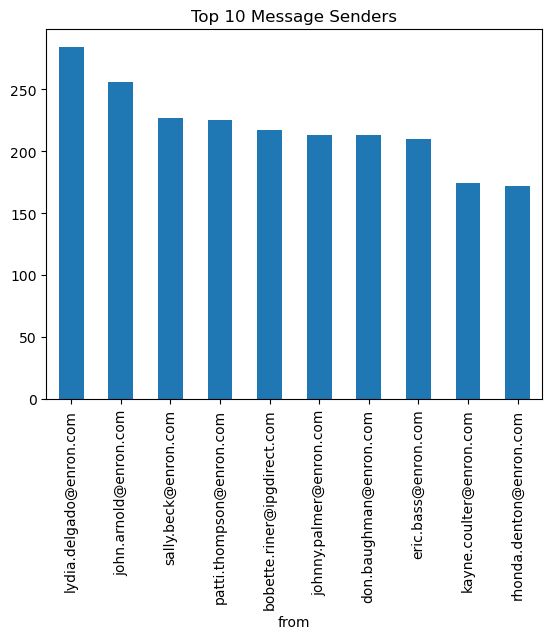

In [24]:
# Messages sent per employee
top_senders = df['from'].value_counts().head(10)
top_senders.plot(kind='bar', title='Top 10 Message Senders')